In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
detection_limit = 5
exposure = 900 # seconds
zero_point = 5.16e9

gmt_area = 365.423
jwst_area = 27.194
hst_area = 4.235

gmt_lim_J = 2.5*(np.log10(zero_point) -
                 np.log10(detection_limit**2/(gmt_area*exposure)))
gmt_lim_J


34.57937020273613

In [48]:
hst_exposure = (detection_limit/(zero_point*hst_area))*10**(0.4*gmt_lim_J)
jwst_exposure = (detection_limit/(zero_point*jwst_area))*10**(0.4*gmt_lim_J)

hst_exposure/3600, jwst_exposure/60


(4.314321133412059, 40.31289990439083)

In [49]:
(detection_limit/(zero_point*(np.pi*16)))*10**(0.4*gmt_lim_J)/60


21.80957878855121

In [50]:
hst_lim = 2.5*(np.log10(5.16e9)-np.log10(25/(4.235*60*15)))
jwst_lim = 2.5*(np.log10(5.16e9)-np.log10(25/(27.194*60*15)))
gmt_lim = 2.5*(np.log10(5.16e9)-np.log10(25/(365.423*60*15))) 
(hst_lim,jwst_lim,gmt_lim)

(29.739514042653063, 31.758563239018947, 34.57937020273613)

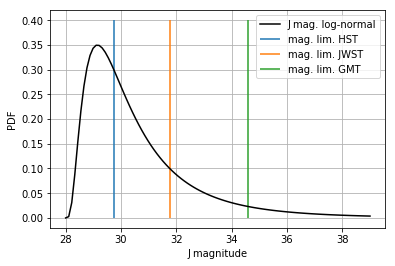

In [25]:
fig,ax = plt.subplots()
l = 0.4
ax.vlines(hst_lim,0,l,"C0",label="mag. lim. HST")
ax.vlines(jwst_lim,0,l,"C1",label="mag. lim. JWST")
ax.vlines(gmt_lim,0,l,"C2",label="mag. lim. GMT")
mu = 0.7
sigma = 0.75
x = np.linspace(1e-9,11,101)
pdf = np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))
ax.plot(28+x,pdf,"k",label="J mag. log-normal")
ax.grid()
ax.set_xlabel("J magnitude")
ax.set_ylabel("PDF")
ax.legend()

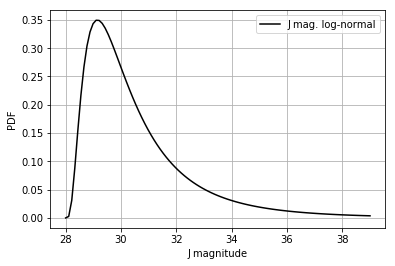

In [46]:
fig,ax = plt.subplots()
l = 0.4
#ax.vlines(hst_lim,0,l,"C0",label="mag. lim. HST")
#ax.vlines(jwst_lim,0,l,"C1",label="mag. lim. JWST")
#ax.vlines(gmt_lim,0,l,"C2",label="mag. lim. GMT")
mu = 0.7
sigma = 0.75
x = np.linspace(1e-9,11,101)
pdf = np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))
ax.plot(28+x,pdf,"k",label="J mag. log-normal")
ax.grid()
ax.set_xlabel("J magnitude")
ax.set_ylabel("PDF")
ax.legend()

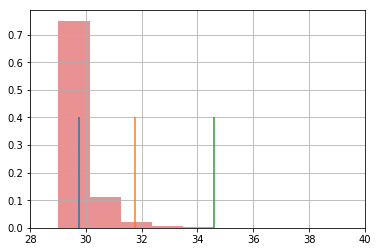

In [7]:
mun = np.log(mu**2/np.sqrt(mu**2+sigma**2))
varn = np.log(1+(sigma/mu)**2)
z = np.random.randn(100000)
x = 29+np.exp(mun+np.sqrt(varn)*z)
fig,ax = plt.subplots()
ax.hist(x,bins=20,density=True,color="C3",alpha=0.5)
ax.vlines(hst_lim,0,l,"C0",label="mag. lim. HST")
ax.vlines(jwst_lim,0,l,"C1",label="mag. lim. JWST")
ax.vlines(gmt_lim,0,l,"C2",label="mag. lim. GMT")
ax.set_xlim([28,40])
ax.grid()

In [6]:
cluster = np.load("cluster.pkl",allow_pickle=True)

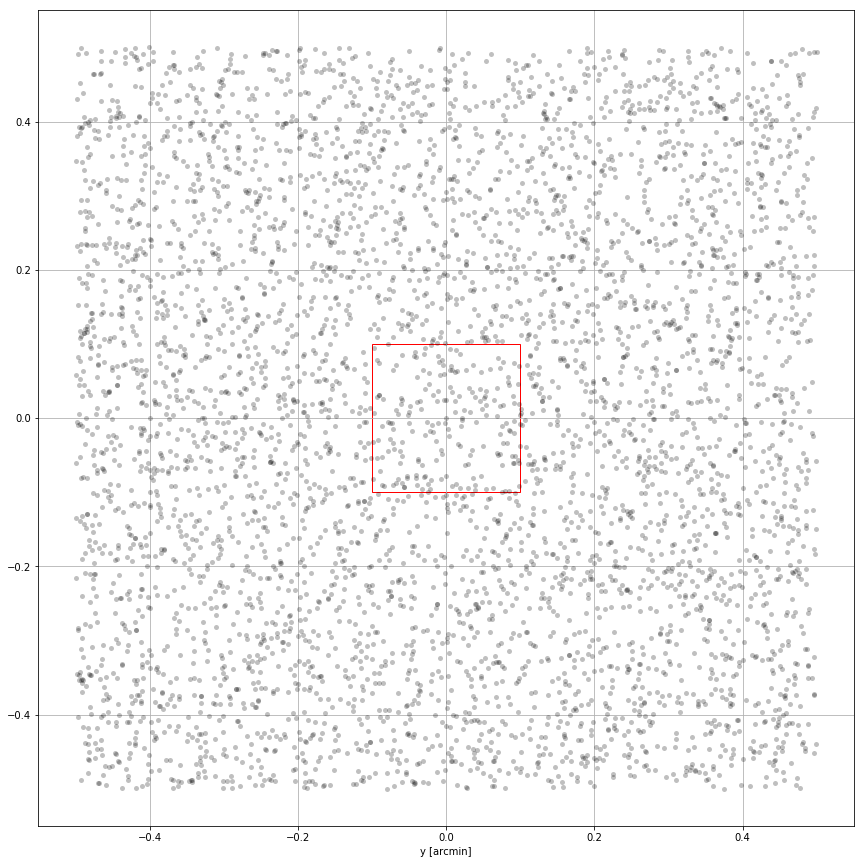

In [7]:
import matplotlib.patches as patches
x = np.asarray([c['coordinates'][0]['Radian'] for c in cluster])*180*60/np.pi
y = np.asarray([c['coordinates'][1]['Radian'] for c in cluster])*180*60/np.pi
m = np.asarray([c['magnitude'] for c in cluster])

fig,ax = plt.subplots(figsize=(15,15))
ax.plot(x,y,'ko',ms=5,mec='none',alpha=0.25)
ax.grid()
ax.set_aspect('equal')
ax.set_xlabel("x [arcmin]")
ax.set_xlabel("y [arcmin]")

rect = patches.Rectangle((-0.1, -0.1), 0.2, 0.2, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

#ax.set_xlim(np.asarray([-1,1])/2)
#ax.set_ylim(np.asarray([-1,1])/2)

Text(0.5, 0, 'y [arcsec]')

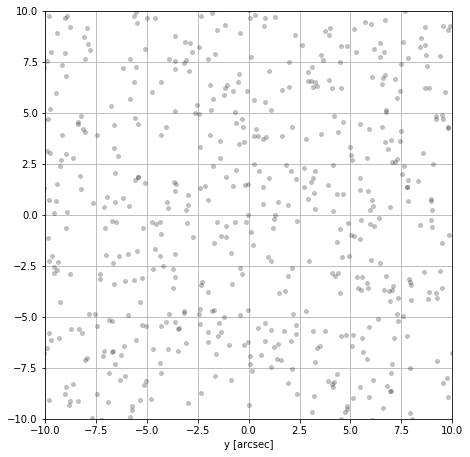

In [8]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.plot(x*60, y*60, 'ko', ms = 5, mec = 'none', alpha = 0.25)
ax.grid()
ax.set_aspect('equal')
ax.set_xlim(np.asarray([-1,1])*10)
ax.set_ylim(np.asarray([-1,1])*10)
ax.set_xlabel("x [arcsec]")
ax.set_xlabel("y [arcsec]")


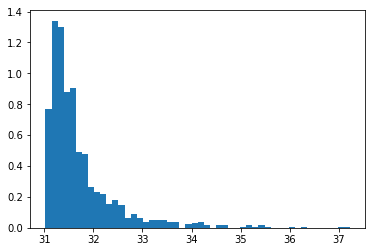

In [11]:
plt.hist(m,50,density=True);